#### 의사결정나무<br>
데이터에 있는 규칙을 찾아내어 트리 기반의 규칙을 만드는 모델로 분류와 회귀 모두 가능하다.<br>
쉽고 직관적이며, 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않다. But, 과적화가 일어나기 쉽기 때문에 hyperparameter 튜닝 필요<br>
**from sklearn.tree import DecisionTreeClassifier**<br>
**from sklearn.tree import DecisionTreeRegressor**

---
#### (1) 매개변수
criterion : 노드를 분할할 때 사용할 함수
- gini(default) , entropy 중 선택<br>

splitter : 노드를 선택하는 방식
- best(default) , random 중 선택
- best는 가장 좋은 노드
- random은 임의의 노드 선택<br>

**max_depth** : 트리의 최대 깊이 설정
- default = None
- int로 설정<br>

**min_samples_split** : 내부노드를 분할하는 데 필요한 최소의 샘플 수 설정
- default = 2
- float로 설정<br>
- classifier만 사용 가능

**min_samples_leaf** : 리프노드에 있어야 하는 최소 샘플 수 설정
- default = 1
- float로 설정<br>

min_samples : 내부노드를 분할하는 데 필요한 최소 샘플 수 설정
- default = 1
- float형
- regressor만 사용 가능

max_feature : 최상의 분할을 찾을 때 고려하는 변수의 개수
- dafult = None
- int 또는 'auto','sqrt','log2' 중 선택 가능<br>

random_state : 추정량의 임의성 제어
- default : None
- int형

max_leaf_nodes : 최대 리프 노드 수 설정
- dafault = None
- int로 설정<br>

min_impurity_decrease : 해당 값보다 작거나 같은 수준으로 불순도가 감소할 경우 노드를 분할
- default = 0.0
- float로 설정<br>

ccp_alpha : pruning(가지치기)에 사용하는 파라미터
- ccp_alpha보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택
- default = 0.0
- float로 설정
- 값이 클수록 정리되는 가지의 수가 늘어남

---
#### (2) 속성
feature_importance_ : 변수중요도 반환/ (n_features,) 형태의 array

---
#### (3) 메서드
cost_complexity_pruning_path(X,y) : 최소비용-복잡성 가지치기 방식의 가지치기 경로를 계산
- X : 샘플데이터, 2차원 array 형태로 입력
- Y : 타깃데이터, (n_samples,) 또는 (n_samples, n_targets) 형태로 입력
- 반환값 : 딕셔너리 형태의 ccp_path가 반환, ccp_alphas는 가지치기 동안의 서브트리에 대한 effective alpha 값이며, ccp_alpha 값에 상응하는 서브트리 리프들의 불순도 합이다.<br>

fit(X,y) : 모델을 학습
- X : 학습데이터, 2차원 array 형태로 입력
- Y : 타깃데이터, (n_samples,) 또는 (n_samples, n_targets) 형태로 입력
- 반환값 : 결정트리 분류기를 object로 반환

predict(X) : 의사결정나무 모델을 사용해 예측
- X : 데이터샘플
- 반환값 : 예측값을 array로 반환

predict_proba(X) : 확률을 추정
- X : 데이터샘플
- 반환값 : 클래스에 대한 샘플데이터의 확률
- classifier만 사용 가능

score(X,y) : 예측의 평균 정확도를 반환
- X : 테스트 샘플을 array로 입력
- y : X의 실제 값
- 반환값 : 평균 정확도를 float로 반환

---
##### 의사결정나무 시각화

ex) petal_width (cm) <= 0.8
 - 해당 노드에서 데이터를 분류하는 기준 (petal width (cm)값이 0.8보다 작으면 왼쪽 노드, 크면 오른쪽 노드로 분류)
 
gini : 해당 노드의 불순도 값. 0에 가까울수록 해당 노드의 데이터들이 한 범주에 속해있으며, 1에 가까울수록 다양한 범주의 데이터들이 섞여있음을 의미
 
samples : 해당 노드에 있는 데이터의 수
 
values : 해당 노드의 데이터들이 속해있는 범주별 갯수

class : values의 값 중 가장 큰 값의 범주 이름

노드의 색상 -> 각 노드의 최종 분류 범주를 의미 (ex- setosa:주황색, versicolor:초록색, virginica:보라색)
노드 색의 밝기 정도 -> 노드의 지니지수 값이 작을수록 색이 진하며, 값이 클수록 색이 연하다.


<img src="../이미지/의사결정나무_graph.png" width="40%" height="30%" title="px(픽셀) 크기 설정" alt="RubberDuck"></img>

#### classifier

In [4]:
# 샘플 데이터 로드

import pandas as pd
credit = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/credit_final.csv')
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [5]:
# 샘플 데이터에서 x와 y 저장 후 train데이터와 test데이터로 분리

feature_columns = list(credit.columns.difference(['credit.rating']))
x = credit[feature_columns]
y = credit['credit.rating']

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 1)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(700, 20)
(300, 20)
(700,)
(300,)


### DecisionTree 모델 생성 
 y값이 0과 1인 범주형 데이터이기 때문에 classifier로 모델 생성<br>
 max_depth : 트리의 최대 깊이 설정, int(dafault = None) 

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5)

분류모델이기 때문에 성능평가 지표로 confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 선택<br>
confusion_matrix : 행 - 실제값, 열 - 예측값

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(test_x)
test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[ 28  62]
 [ 26 184]]


정확도	70.67%
정밀도	74.8%
재현율	87.62%
F1	80.7%


precision(정밀도) = TP/(TP+FP)<br>
recall(재현율) = TP/(TP+FN)<br>
f1-score = 2 * precision * recall/(precision+recall)<br>
support : 각 범주의 표본 갯수<br>
macro_avg : 각 성능지표의 평균값<br>
weight_avg : 각 범주에 속하는 표본의 갯수로 구한 각 성능지표의 가중평균<br>
ex) (90/(90+210) * 0.52 + 210/(90+210) * 0.75) = 0.681

In [9]:
from sklearn.metrics import classification_report

report = classification_report(test_y, pred)

print(report)

              precision    recall  f1-score   support

           0       0.52      0.31      0.39        90
           1       0.75      0.88      0.81       210

    accuracy                           0.71       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.68      0.71      0.68       300



### ROC Curve

x축 : 1 - Specificity = 1 - (TF / (TF + FP))<br>
y축 : Sensitivity = (TP/ (TP + FN))

그래프가 좌상단에 가까울수록, auroc값이 1에 가까울수록 좋은 모델

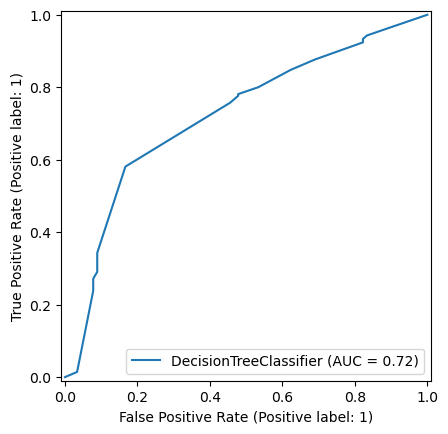

ROC_AUC_score :  0.7221428571428572


In [16]:
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# plot_roc_curve(clf,test_x, test_y)
RocCurveDisplay.from_estimator(clf,test_x, test_y)
plt.show()
R_A_score = roc_auc_score(test_y, clf.predict_proba(test_x)[:,1])
print('ROC_AUC_score : ',R_A_score)

### feature_importrances_

변수 중요도를 반환한다.<br>
데이터(컬럼)의 순서대로 중요도를 반환하며, 모든 중요도의 합은 1이다.

In [17]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(x.columns)
feature_importances = pd.concat([column_nm,pd.DataFrame(importances)],
                               axis = 1)
feature_importances.columns = ['feature_nm','importances']
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.263282
1                              age     0.099625
2                   apartment.type     0.036866
3                     bank.credits     0.000000
4                    credit.amount     0.095584
5           credit.duration.months     0.187908
6                   credit.purpose     0.059083
7                   current.assets     0.000000
8                       dependents     0.000000
9              employment.duration     0.000000
10                  foreign.worker     0.000000
11                       guarantor     0.000000
12                installment.rate     0.000000
13                  marital.status     0.013993
14                      occupation     0.011790
15                   other.credits     0.034003
16  previous.credit.payment.status     0.123825
17              residence.duration     0.020960
18                         savings     0.053080
19                       telephone     0

graphviz를 통해 의사결정나무 시각화 가능<br>
(graphviz는 설치 시 경로 설정 필수)

#### export_graphviz<br> (모델,<br> feature_names = 컬럼이름,<br> class_names = Y값 범주 이름,<br> filled = 'True면 노드 색칠,<br> False면 노드 흰색',<br> rounded = 'True면 둥근 네모,<br> False면 직사각형',<br> special_characters = 'True면 그래프에서 특수문자 허용') 
<br>
<br>
- filled를 True로 설정했을 때,
- 색상의 명암은 지니지수가 크면 밝고, 지니지수가 작으면 어두움 (리프 노드로 갈수록 어두워짐)
- 노드에 포함되어 있는 값들 중 가장 많은 범주에 해당하는 색상을 출력

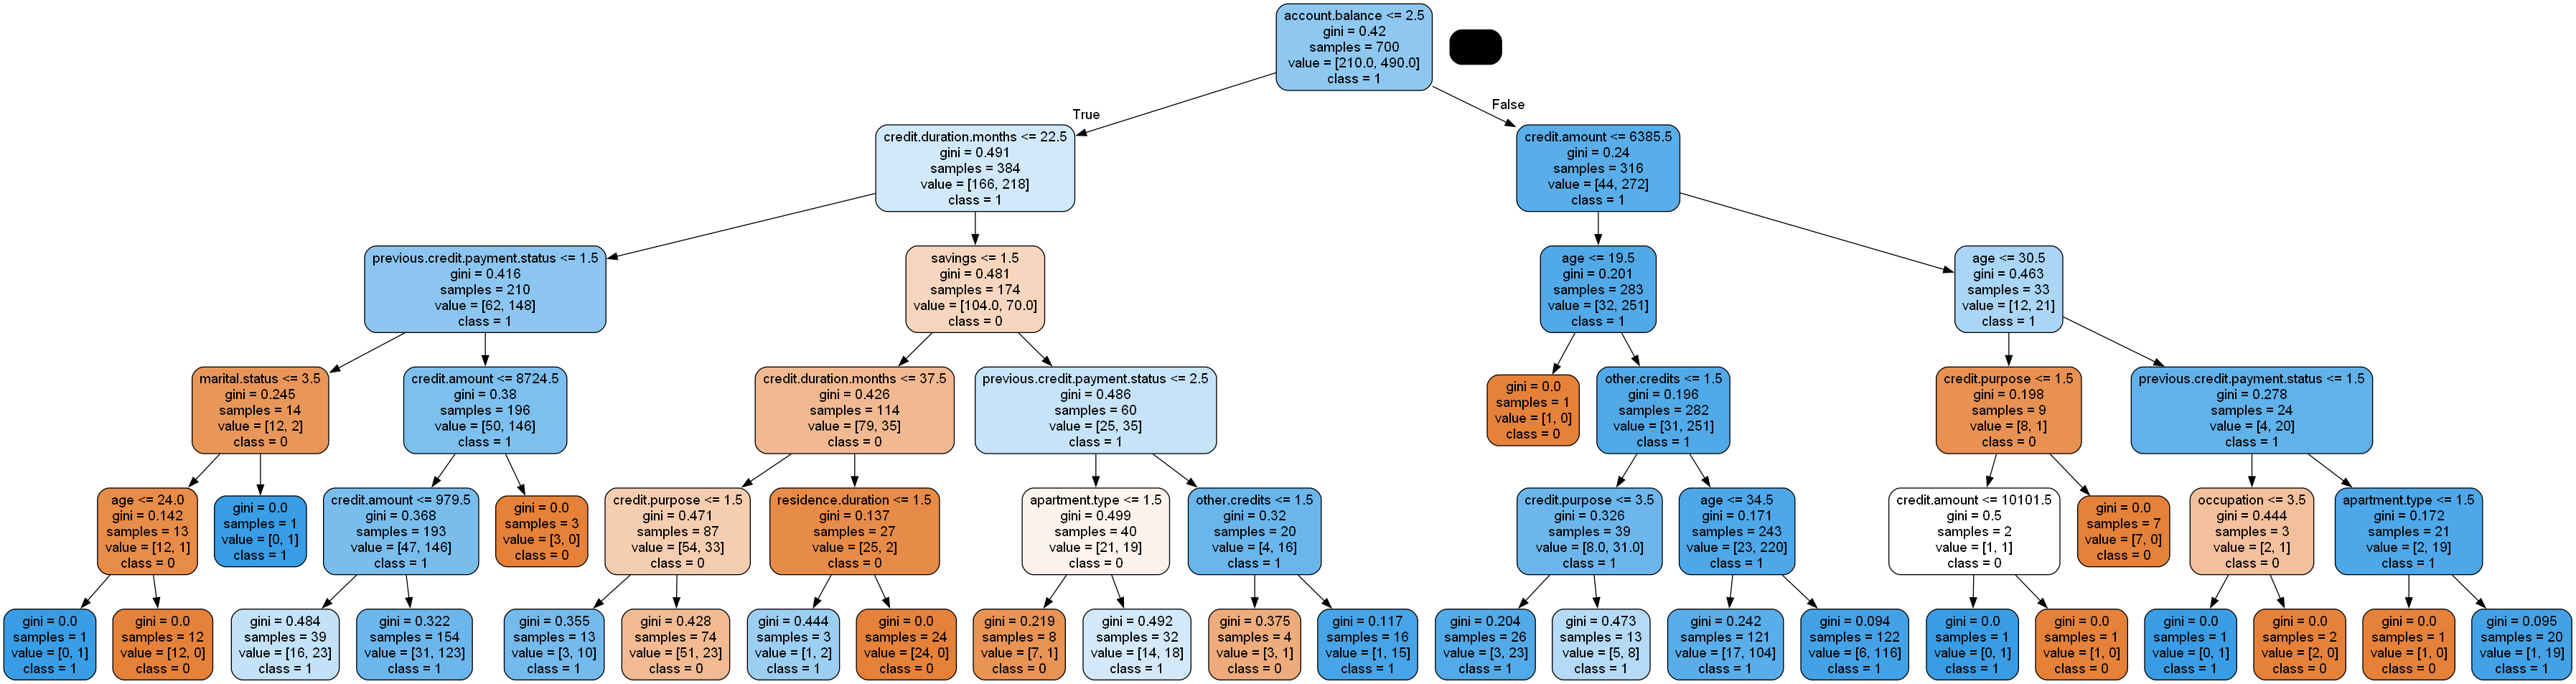

In [27]:
import numpy as np 
feature_names = feature_columns
target_names = np.array(['0','1'])

import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz(clf,
                              feature_names = feature_names,
                              class_names = target_names,
                              filled = True, rounded = True,
                              special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

#### regressor

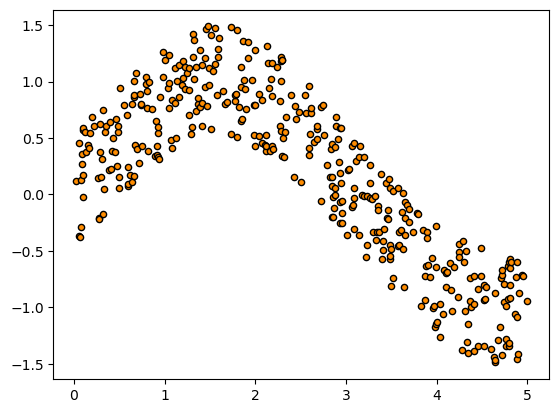

In [17]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 임의 데이터 생성하기
np.random.seed(0)
x = np.sort(5 * np.random.rand(400,1), axis = 0)
t = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

#노이즈 추가하기
y[::1] += 1 * (0.5 - np.random.rand(400))
plt.scatter(x, y, s = 20, edgecolor = 'black', c = 'darkorange', label = 'data')

In [3]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.7, random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


y값이 연속형이기 때문에 회귀 의사결정나무

In [4]:
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 5)

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_1 = regr_1.fit(train_x, train_y).predict(test_x)
y_2 = regr_2.fit(train_x, train_y).predict(test_x)
preds = [y_1, y_2]
weights = ['max depth = 2', 'max depth = 5']
evls = ['mse','rmse','mae']
results = pd.DataFrame(index = weights, columns = evls)

for pred,nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm,'mse'] = round(mse,2)
    results.loc[nm,'rmse'] = round(rmse,2)
    results.loc[nm,'mae'] = round(mae,2)
    
results

,mse,rmse,mae
max depth = 2,0.12,0.35,0.29
max depth = 5,0.12,0.35,0.3


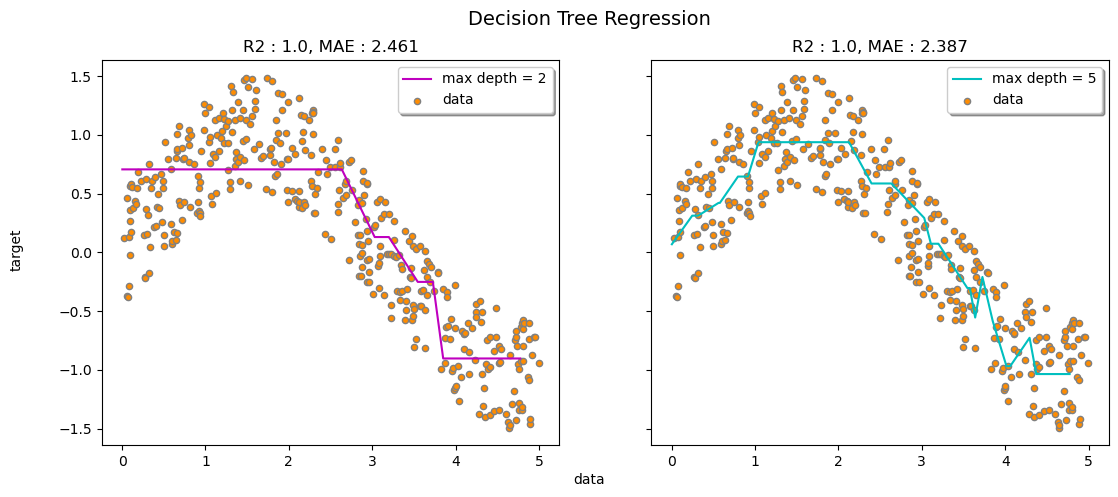

In [6]:
x_test = np.sort(5 * np.random.rand(40,1), axis = 0)

regrs = [regr_1, regr_2]
depths = ['max depth = 2','max depth = 5']
model_color = ['m','c']
fig,axes = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (13, 5))

for ix, regr in enumerate(regrs):
    pred = regr.fit(x,y).predict(x_test)
    r2 = regr.score(x_test,pred)
    mae = mean_absolute_error(x_test, pred)
    
    axes[ix].plot(x_test,
                 pred,
                 color = model_color[ix],
                 label = "{}".format(depths[ix]))
    
    axes[ix].scatter(x,y,
                    s = 20,
                    edgecolor = 'gray',
                    c = 'darkorange',
                    label = 'data')
    axes[ix].legend(loc='upper right',
                   ncol = 1,
                   fancybox = True,
                   shadow = True)
    axes[ix].set_title('R2 : {r}, MAE : {m}'.format(r = round(r2,3),m = round(mae,3)))
    
fig.text(0.5, 0.04, 'data',ha = 'center',va = 'center')
fig.text(0.06, 0.5, 'target',ha = 'center',va = 'center', rotation = 'vertical')
fig.suptitle('Decision Tree Regression', fontsize = 14)
plt.show()